Drawing Functions in OpenCV

In [10]:
# Drawing Line

import numpy as np
import cv2 as cv

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)


array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

In [11]:
# ТРЕУГОЛЬНИК
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
# КРУГ
cv.circle(img,(447,63), 63, (0,0,255), -1)
# ЭЛЛИПС
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
# ПОЛИГОН
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))
# Добавление текста к изображениям
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)


array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

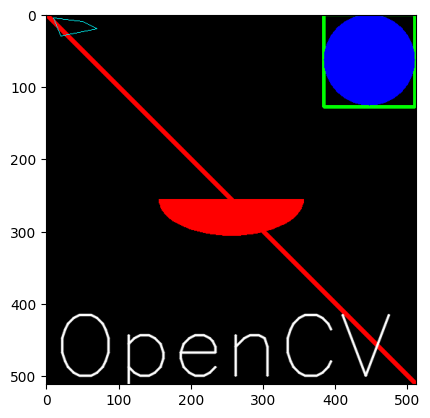

In [12]:
from matplotlib import pyplot as plt

# рисуем
plt.imshow(img)
# выводим
plt.show()

## Performance Measurement and Improvement Techniques ##
измерение производительности кода.
Несколько советов по повышению производительности кода.
следующие функции: cv.GetTickCount, cv.getTickFrequency и т.д.

In [13]:
# Measuring Performance with OpenCV

# The cv.getTickCount function returns the number of clock-cycles after a reference event (like the moment the machine was switched ON) to the moment this function is called. So if you call it before and after the function execution, you get the number of clock-cycles used to execute a function.

# The cv.getTickFrequency function returns the frequency of clock-cycles, or the number of clock-cycles per second. So to find the time of execution in seconds, you can do following:

e1 = cv.getTickCount()
# your code execution
a = 6**1000000

e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
print(format(time,'.8f'))
e3 = cv.getTickCount()



0.09063210


In [14]:
img1 = cv.imread('img.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
e1 = cv.getTickCount()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
e2 = cv.getTickCount()
t = (e2 - e1)/cv.getTickFrequency()
print( t )

0.5297064


In [15]:
# Default Optimization in OpenCV

# Many of the OpenCV functions are optimized using SSE2, AVX, etc. It contains the unoptimized code also. So if our system support these features, we should exploit them (almost all modern day processors support them). It is enabled by default while compiling. So OpenCV runs the optimized code if it is enabled, otherwise it runs the unoptimized code. You can use cv.useOptimized() to check if it is enabled/disabled and cv.setUseOptimized() to enable/disable it. Let's see a simple example.

# check if optimization is enabled
img = cv.imread('img.png')
cv.setUseOptimized(True)
print(cv.useOptimized())
%timeit res = cv.medianBlur(img,49)

# Disable it
cv.setUseOptimized(False)
print(cv.useOptimized())
%timeit res = cv.medianBlur(img,49)




True
25.5 ms ± 310 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
False
26 ms ± 441 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
# Measuring Performance in IPython
# compare the performance of two similar operations.

x = 5
%timeit y=x**2
%timeit y=x*x
z = np.uint8([5])
%timeit y=z*z
%timeit y=np.square(z)


26.6 ns ± 0.258 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
17.5 ns ± 0.311 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
393 ns ± 3.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
384 ns ± 3.16 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [17]:
img = cv.imread('img.png')
# %timeit z = cv.countNonZero(img)
# %timeit z = np.count_nonzero(img)

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\count_non_zero.dispatch.cpp:124: error: (-215:Assertion failed) cn == 1 in function 'cv::countNonZero'


Getting Started with Videos

In [18]:
# Capture Video from Camera

import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

In [23]:
# Saving a Video

import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)

    # write the flipped frame
    out.write(frame)

    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

In [25]:
# Playing Video from file


import numpy as np
import cv2 as cv

cap = cv.VideoCapture('output.avi')

while cap.isOpened():
    ret, frame = cap.read()

    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...
